# Tajo Test

In [1]:
import seaborn as sns
import requests as r
import pandas as pd
import matplotlib.pyplot as plt

from datetime import datetime

In [2]:
data = r.get('https://epistat.sciensano.be/Data/COVID19BE_tests.json').json()

In [3]:
df = pd.DataFrame(data)
df.info
df.describe(include='all') 

,DATE,PROVINCE,REGION,TESTS_ALL,TESTS_ALL_POS
count,4776,4378,4378,4776.000000,4776.000000
unique,398,11,3,NaN,NaN
top,2020-04-23,VlaamsBrabant,Wallonia,NaN,NaN
freq,12,398,1990,NaN,NaN
mean,NaN,NaN,NaN,2366.728853,207.716290
std,NaN,NaN,NaN,2334.314553,373.843595
min,NaN,NaN,NaN,0.000000,0.000000
25%,NaN,NaN,NaN,672.750000,23.000000
50%,NaN,NaN,NaN,1533.000000,84.000000
75%,NaN,NaN,NaN,3338.250000,240.000000


In [4]:
df = df[~df.PROVINCE.isnull()]

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4378 entries, 0 to 4775
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   DATE           4378 non-null   object
 1   PROVINCE       4378 non-null   object
 2   REGION         4378 non-null   object
 3   TESTS_ALL      4378 non-null   int64 
 4   TESTS_ALL_POS  4378 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 205.2+ KB


In [6]:
df.sample(3)

,DATE,PROVINCE,REGION,TESTS_ALL,TESTS_ALL_POS
3273,2020-11-28,OostVlaanderen,Flanders,4351,368
3192,2020-11-22,Antwerpen,Flanders,2525,250
3851,2021-01-15,WestVlaanderen,Flanders,5971,352


In [7]:
df['TESTS_ALL_CUMSUM'] = df.groupby('PROVINCE')['TESTS_ALL'].transform(pd.Series.cumsum)
df['DATE_PARSED'] = df.DATE.map(lambda s: datetime.strptime(s, '%Y-%m-%d'))

In [8]:
df_month = df[df.DATE_PARSED.map(lambda d: d.day == 1)]
df_month.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 154 entries, 0 to 4763
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   DATE              154 non-null    object        
 1   PROVINCE          154 non-null    object        
 2   REGION            154 non-null    object        
 3   TESTS_ALL         154 non-null    int64         
 4   TESTS_ALL_POS     154 non-null    int64         
 5   TESTS_ALL_CUMSUM  154 non-null    int64         
 6   DATE_PARSED       154 non-null    datetime64[ns]
dtypes: datetime64[ns](1), int64(3), object(3)
memory usage: 9.6+ KB


In [9]:
df_month.sample(2)

,DATE,PROVINCE,REGION,TESTS_ALL,TESTS_ALL_POS,TESTS_ALL_CUMSUM,DATE_PARSED
4053,2021-02-01,OostVlaanderen,Flanders,5575,278,1210178,2021-02-01
2568,2020-10-01,Antwerpen,Flanders,5755,401,568156,2020-10-01


<AxesSubplot:xlabel='DATE', ylabel='TESTS_ALL_CUMSUM'>

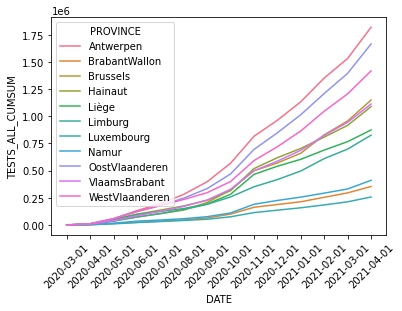

In [10]:
plt.xticks(rotation=45)
sns.lineplot(data=df_month, x="DATE", y="TESTS_ALL_CUMSUM", hue='PROVINCE')